# GAN Demo

## Load Libraries

In [1]:
import torch
import torch.optim as optim
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

/home/tw17/.local/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


## Load Utils

In [2]:
from models.gan_train import train_gan
from models.utils import show_images

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
NOISE_DIM = 100

## Load Losses

In [5]:
from models.gan_loss import discriminator_loss, generator_loss, ls_discriminator_loss, ls_generator_loss

## LNN-based GAN

### Load Model

In [6]:
from models.gan import LNN_Discriminator, LNN_Generator

### Load Data

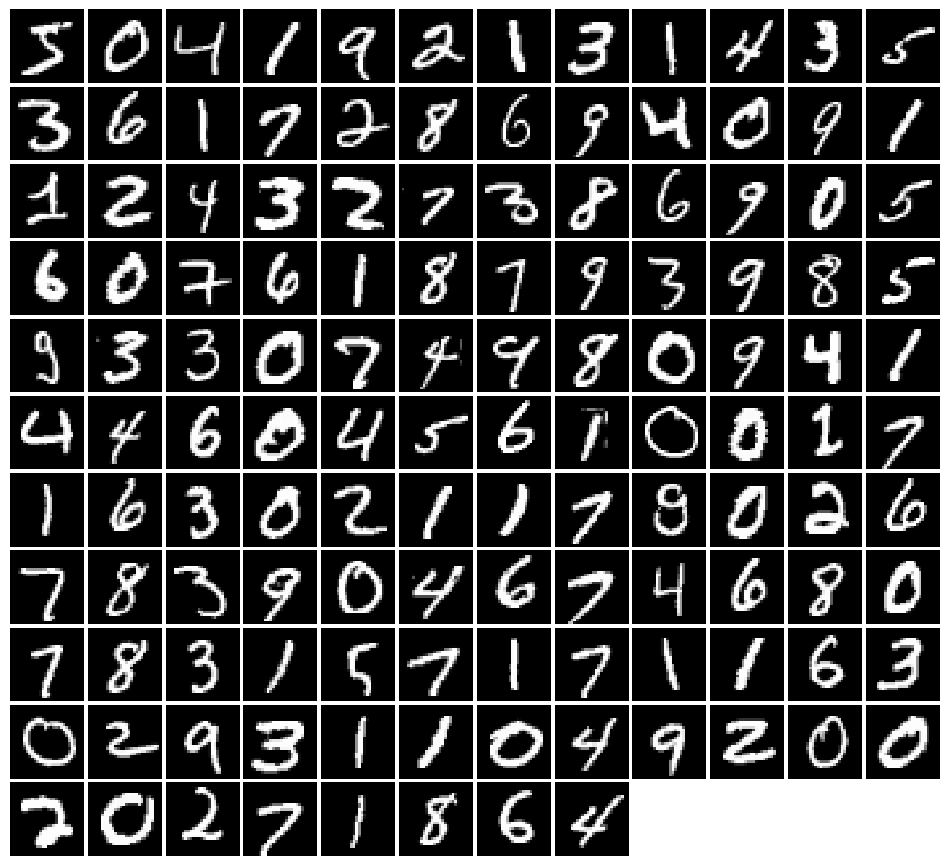

In [7]:
batch_size = 128

mnist = datasets.MNIST('./data', train=True, download=True, transform=transforms.ToTensor())
train_loader = DataLoader(mnist, batch_size=batch_size, drop_last=True)

try:
  imgs = next(iter(train_loader))[0].view(batch_size, 784).numpy().squeeze()
except:
  imgs = train_loader.__iter__().next()[0].view(batch_size, 784).numpy().squeeze()

show_images(imgs)

### GAN Loss

EPOCH:  1
Iter: 0, D: 1.379, G:0.7094


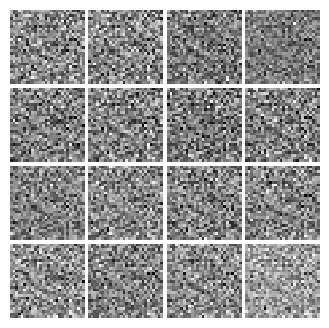


EPOCH:  2
Iter: 500, D: 1.392, G:0.5288


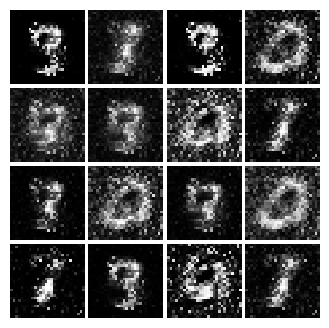


EPOCH:  3
Iter: 1000, D: 0.9499, G:1.165


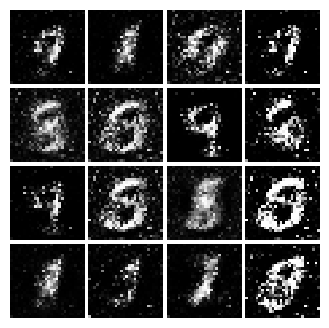


EPOCH:  4
Iter: 1500, D: 1.107, G:1.141


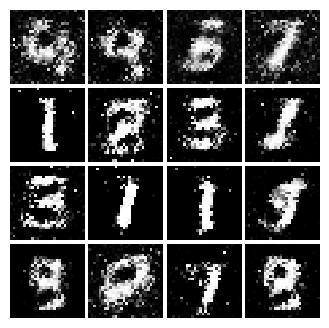


EPOCH:  5
Iter: 2000, D: 1.195, G:0.9244


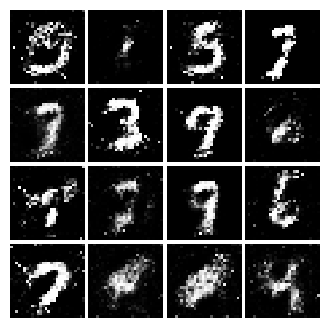


EPOCH:  6
Iter: 2500, D: 1.286, G:0.9995


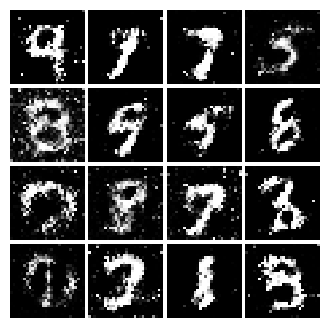


EPOCH:  7
Iter: 3000, D: 1.365, G:0.74


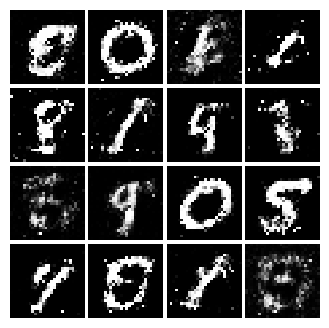


EPOCH:  8
Iter: 3500, D: 1.34, G:0.8129


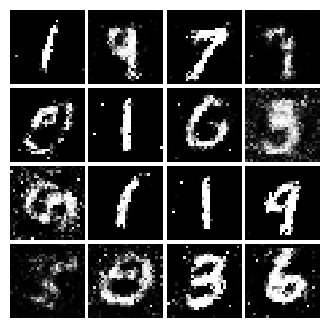


EPOCH:  9
Iter: 4000, D: 1.344, G:0.8271


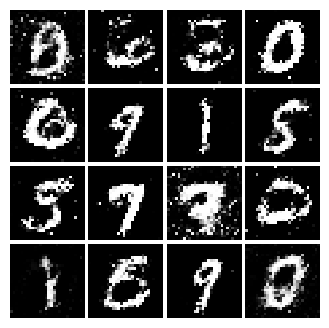


EPOCH:  10
Iter: 4500, D: 1.252, G:0.889


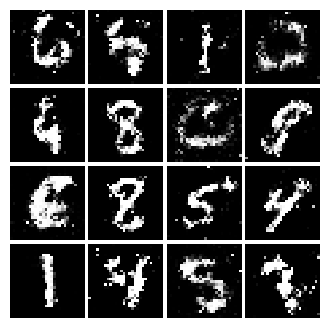

In [8]:
LNN_D = LNN_Discriminator(input_channels=1, image_size=28).to(device)
LNN_G = LNN_Generator(NOISE_DIM).to(device)

LNN_D_optimizer = optim.Adam(LNN_D.parameters(), lr=1e-3, betas = (0.5, 0.999))
LNN_G_optimizer = optim.Adam(LNN_G.parameters(), lr=1e-3, betas = (0.5, 0.999))

train_gan(LNN_D, LNN_G, LNN_D_optimizer, LNN_G_optimizer, discriminator_loss, generator_loss, show_every=500, train_loader=train_loader, num_epochs=10, device=device)

### LSGAN Loss

EPOCH:  1
Iter: 0, D: 0.4261, G:0.4792


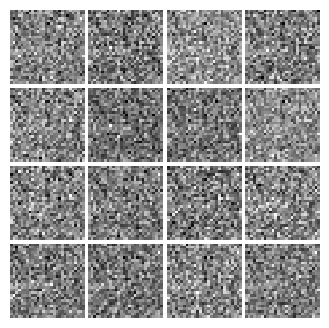


EPOCH:  2
Iter: 500, D: 0.1366, G:0.2828


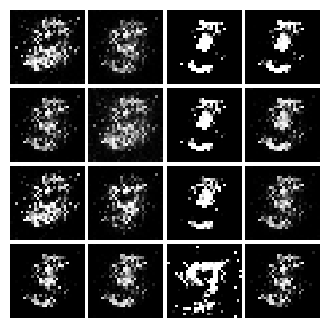


EPOCH:  3
Iter: 1000, D: 0.09745, G:0.3145


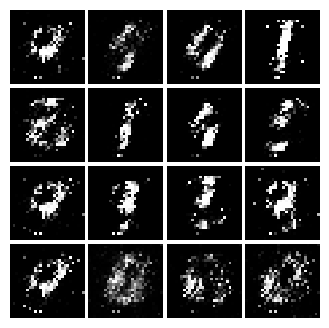


EPOCH:  4
Iter: 1500, D: 0.2675, G:0.1489


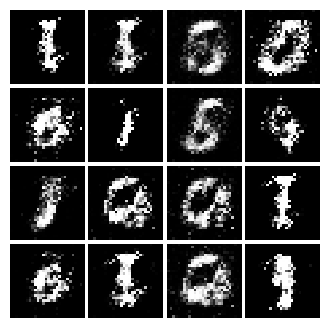


EPOCH:  5
Iter: 2000, D: 0.2025, G:0.2025


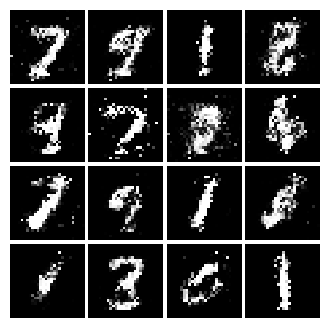


EPOCH:  6
Iter: 2500, D: 0.225, G:0.1905


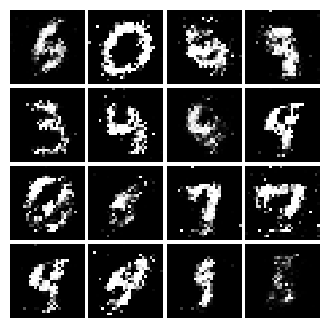


EPOCH:  7
Iter: 3000, D: 0.1967, G:0.1714


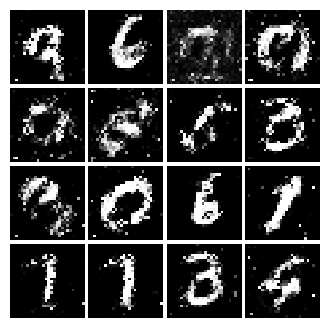


EPOCH:  8
Iter: 3500, D: 0.2513, G:0.1864


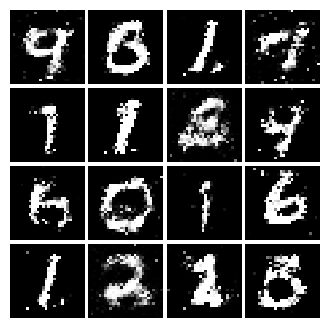


EPOCH:  9
Iter: 4000, D: 0.2421, G:0.1679


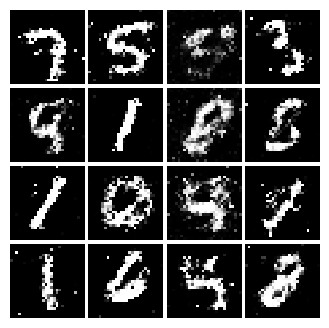


EPOCH:  10
Iter: 4500, D: 0.2424, G:0.1579


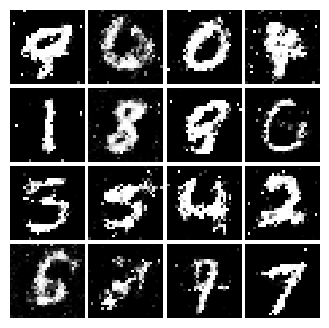

In [9]:
LNN_D_LS = LNN_Discriminator(input_channels=1, image_size=28).to(device)
LNN_G_LS = LNN_Generator(NOISE_DIM).to(device)

LNN_D_LS_optimizer = optim.Adam(LNN_D_LS.parameters(), lr=1e-3, betas = (0.5, 0.999))
LNN_G_LS_optimizer = optim.Adam(LNN_G_LS.parameters(), lr=1e-3, betas = (0.5, 0.999))

train_gan(LNN_D_LS, LNN_G_LS, LNN_D_LS_optimizer, LNN_G_LS_optimizer, ls_discriminator_loss, ls_generator_loss, show_every=500, train_loader=train_loader, num_epochs=10, device=device)

## CNN-baed GAN

### Load Model

In [10]:
from models.gan import CNN_Discriminator, CNN_Generator

### Load Data

In [11]:
batch_size = 64
image_size = 64
cat_root = './data/cats'

cat_train = ImageFolder(root=cat_root, transform=transforms.Compose([
  transforms.ToTensor(),
  transforms.Resize(int(1.15 * image_size), antialias=True),
  transforms.RandomCrop(image_size),
  transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
]))

cat_train_loader = DataLoader(cat_train, batch_size=batch_size, drop_last=True)

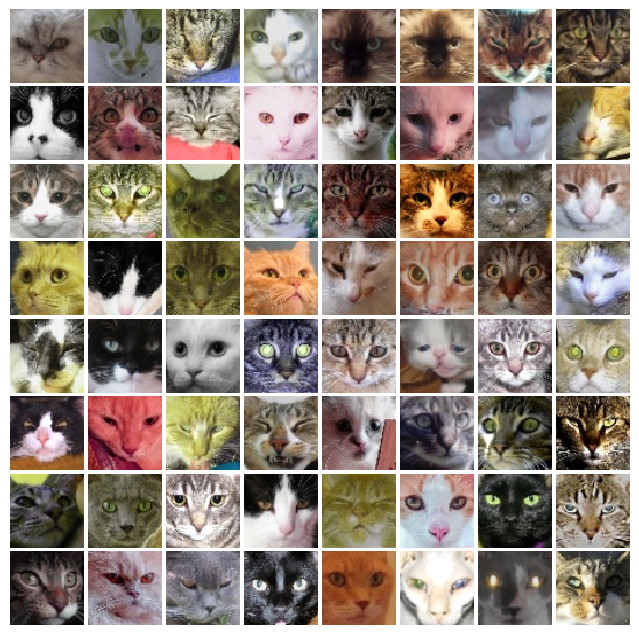

In [12]:
try:
  imgs = next(iter(cat_train_loader))[0].numpy().squeeze()
except:
  imgs = cat_train_loader.__iter__().next()[0].numpy().squeeze()

show_images(imgs, color=True)

### GAN Loss

EPOCH:  1
Iter: 0, D: 1.448, G:17.82


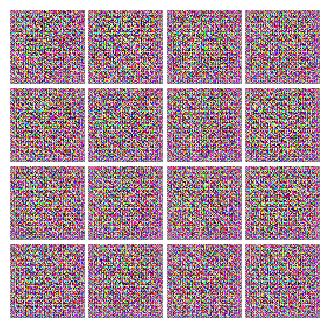


EPOCH:  2
Iter: 250, D: 0.4028, G:5.29


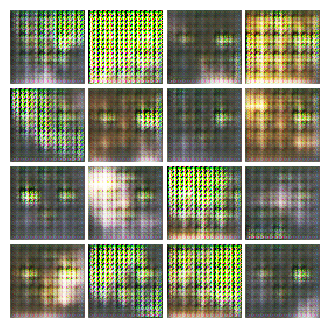


EPOCH:  3


KeyboardInterrupt: 

In [15]:
CNN_D = CNN_Discriminator(input_channels=3).to(device)
CNN_G = CNN_Generator(NOISE_DIM).to(device)

CNN_D_optimizer = optim.Adam(CNN_D.parameters(), lr=1e-3, betas = (0.5, 0.999))
CNN_G_optimizer = optim.Adam(CNN_G.parameters(), lr=1e-3, betas = (0.5, 0.999))

train_gan(CNN_D, CNN_G, CNN_D_optimizer, CNN_G_optimizer, discriminator_loss, generator_loss, show_every=250, train_loader=cat_train_loader, num_epochs=50, device=device)

### LSGAN Loss

In [ ]:
CNN_D_LS = CNN_Discriminator(input_channels=3).to(device)
CNN_G_LS = CNN_Generator(NOISE_DIM).to(device)

CNN_D_LS_optimizer = optim.Adam(CNN_D_LS.parameters(), lr=1e-3, betas = (0.5, 0.999))
CNN_G_LS_optimizer = optim.Adam(CNN_G_LS.parameters(), lr=1e-3, betas = (0.5, 0.999))

train_gan(CNN_D_LS, CNN_G_LS, CNN_D_LS_optimizer, CNN_G_LS_optimizer, discriminator_loss, generator_loss, show_every=250, train_loader=cat_train_loader, num_epochs=50, device=device)